In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori

In [2]:
df_raw = pd.read_csv('survey-responses.csv', sep=',', header=0, encoding='ascii', engine='python')
df_raw.head()

,Timestamp,Age Group,Area,No .of stationery shops near by,How do you rate the stationery shops nearby?,Which brands do you prefer?,Which services do you prefer?,Which of these items are not available in your locality?,Unnamed: 8
0,2/22/2018 12:18:47,20-60,Thane,10,4,"Sundaram, Classmate, Navneet, Camlin","Home delivery, Online services","Party decorations, College ceremonies, Greetin...",NaN
1,2/22/2018 12:29:22,20-60,Chembur,10,4,"Sundaram, Classmate, Navneet",Print,Files and Folders,NaN
2,2/22/2018 12:39:41,16-20,Kalyan,3,5,"Sundaram, Classmate, Navneet, Camlin, Others","Color xerox, Print, Home delivery, Online serv...",NaN,NaN
3,2/22/2018 14:26:11,20-60,Kalyan,3,4,"Sundaram, Classmate, Navneet",Print,NaN,NaN
4,2/22/2018 14:55:16,20-60,Kalyan,5,4,"Sundaram, Classmate, Camlin","Color xerox, Print, Lamination and Binding",NaN,NaN


In [3]:
df = df_raw.iloc[:,1:8]
df.head()

,Age Group,Area,No .of stationery shops near by,How do you rate the stationery shops nearby?,Which brands do you prefer?,Which services do you prefer?,Which of these items are not available in your locality?
0,20-60,Thane,10,4,"Sundaram, Classmate, Navneet, Camlin","Home delivery, Online services","Party decorations, College ceremonies, Greetin..."
1,20-60,Chembur,10,4,"Sundaram, Classmate, Navneet",Print,Files and Folders
2,16-20,Kalyan,3,5,"Sundaram, Classmate, Navneet, Camlin, Others","Color xerox, Print, Home delivery, Online serv...",NaN
3,20-60,Kalyan,3,4,"Sundaram, Classmate, Navneet",Print,NaN
4,20-60,Kalyan,5,4,"Sundaram, Classmate, Camlin","Color xerox, Print, Lamination and Binding",NaN


In [4]:
df.describe()

,No .of stationery shops near by,How do you rate the stationery shops nearby?
count,100.000000,100.000000
mean,4.000000,3.730000
std,2.835561,0.827006
min,0.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,4.000000
max,15.000000,5.000000


In [5]:
IQR = (5-2)
df[df['No .of stationery shops near by'] > 5+2*IQR]

,Age Group,Area,No .of stationery shops near by,How do you rate the stationery shops nearby?,Which brands do you prefer?,Which services do you prefer?,Which of these items are not available in your locality?
37,20-60,Kalyan,15,4,"Sundaram, Classmate","Color xerox, Print, Lamination and Binding",Greeting cards
59,16-20,Kalyan,15,5,"Sundaram, Classmate, Navneet, Camlin","Color xerox, Print, Lamination and Binding","Party decorations, College ceremony items, Gre..."
70,20-60,Kalyan,15,4,Camlin,Print,Party decorations


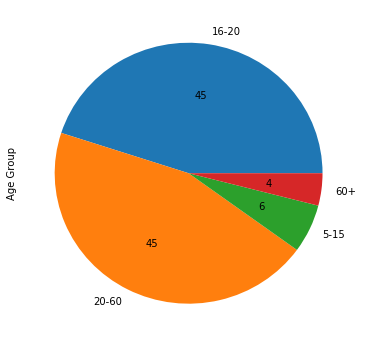

In [6]:
df['Age Group'].value_counts().plot.pie(figsize=(6,6), autopct='%.0f')

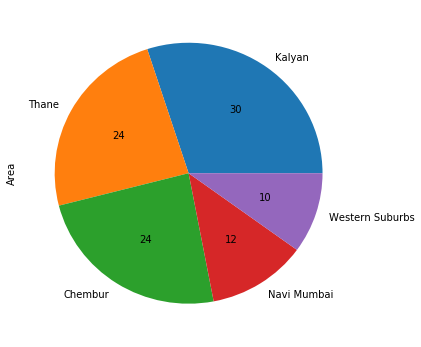

In [7]:
df['Area'].value_counts().plot.pie(figsize=(6,6), autopct='%.0f')

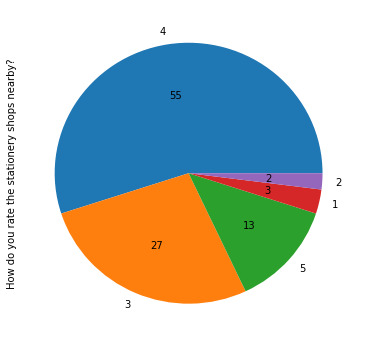

In [8]:
df['How do you rate the stationery shops nearby?'].value_counts().plot.pie(figsize=(6,6), autopct='%.0f')

In [9]:
df.head()

,Age Group,Area,No .of stationery shops near by,How do you rate the stationery shops nearby?,Which brands do you prefer?,Which services do you prefer?,Which of these items are not available in your locality?
0,20-60,Thane,10,4,"Sundaram, Classmate, Navneet, Camlin","Home delivery, Online services","Party decorations, College ceremonies, Greetin..."
1,20-60,Chembur,10,4,"Sundaram, Classmate, Navneet",Print,Files and Folders
2,16-20,Kalyan,3,5,"Sundaram, Classmate, Navneet, Camlin, Others","Color xerox, Print, Home delivery, Online serv...",NaN
3,20-60,Kalyan,3,4,"Sundaram, Classmate, Navneet",Print,NaN
4,20-60,Kalyan,5,4,"Sundaram, Classmate, Camlin","Color xerox, Print, Lamination and Binding",NaN


In [10]:
df.groupby('Area').agg({'No .of stationery shops near by' : np.mean, 'How do you rate the stationery shops nearby?' : np.mean})

,No .of stationery shops near by,How do you rate the stationery shops nearby?
Area,,
Chembur,3.583333,3.875000
Kalyan,4.600000,3.800000
Navi Mumbai,3.666667,4.000000
Thane,4.083333,3.666667
Western Suburbs,3.400000,3.000000


In [11]:
one_hot_brands = df['Which brands do you prefer?'].str.get_dummies(sep=', ')
one_hot_brands.head()

,Camlin,Classmate,Navneet,Others,Sundaram
0,1,1,1,0,1
1,0,1,1,0,1
2,1,1,1,1,1
3,0,1,1,0,1
4,1,1,0,0,1


In [12]:
one_hot_brands = one_hot_brands.astype('bool') 
one_hot_brands.head()

,Camlin,Classmate,Navneet,Others,Sundaram
0,True,True,True,False,True
1,False,True,True,False,True
2,True,True,True,True,True
3,False,True,True,False,True
4,True,True,False,False,True


In [13]:
frequent_itemsets = apriori(one_hot_brands, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.33,[Camlin],1
1,0.72,[Classmate],1
2,0.49,[Navneet],1
3,0.53,[Sundaram],1
4,0.39,"[Classmate, Navneet]",2
5,0.43,"[Classmate, Sundaram]",2
6,0.30,"[Navneet, Sundaram]",2


In [14]:
frequent_itemsets[ (frequent_itemsets['length'] >= 2)]

,support,itemsets,length
4,0.39,"[Classmate, Navneet]",2
5,0.43,"[Classmate, Sundaram]",2
6,0.30,"[Navneet, Sundaram]",2


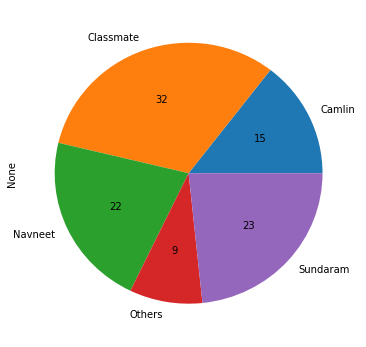

In [15]:
df['Which brands do you prefer?'].str.get_dummies(sep=', ').sum().plot.pie(figsize=(6,6), autopct='%.0f')

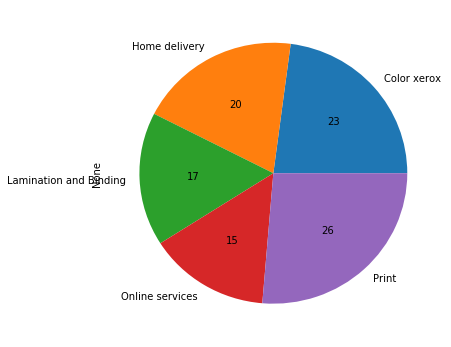

In [16]:
df['Which services do you prefer?'].str.get_dummies(sep=', ').sum().plot.pie(figsize=(6,6), autopct='%.0f')

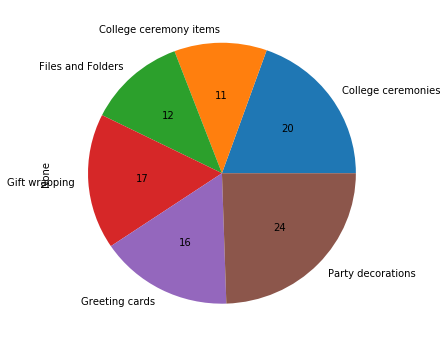

In [17]:
df['Which of these items are not available in your locality?'].str.get_dummies(sep=', ').sum().plot.pie(figsize=(6,6), autopct='%.0f')

In [18]:
df_chembur = df[df['Area'] == 'Chembur']
df_chembur.head()

,Age Group,Area,No .of stationery shops near by,How do you rate the stationery shops nearby?,Which brands do you prefer?,Which services do you prefer?,Which of these items are not available in your locality?
1,20-60,Chembur,10,4,"Sundaram, Classmate, Navneet",Print,Files and Folders
8,16-20,Chembur,3,4,Navneet,Online services,Party decorations
10,16-20,Chembur,5,3,Classmate,"Color xerox, Print, Online services",College ceremonies
12,16-20,Chembur,2,5,Classmate,"Color xerox, Lamination and Binding","Party decorations, College ceremonies"
13,20-60,Chembur,2,5,"Sundaram, Classmate","Color xerox, Print, Online services, Laminatio...","Greeting cards, Files and Folders"


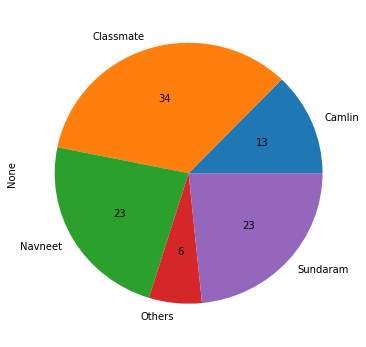

In [19]:
df_chembur['Which brands do you prefer?'].str.get_dummies(sep=', ').sum().plot.pie(figsize=(6,6), autopct='%.0f')

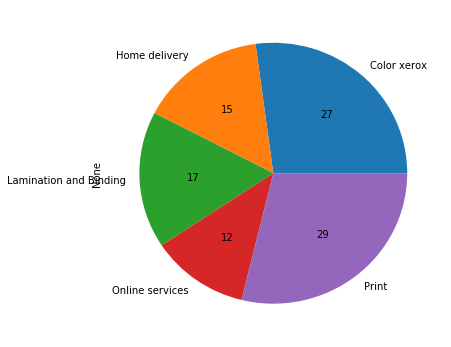

In [20]:
df_chembur['Which services do you prefer?'].str.get_dummies(sep=', ').sum().plot.pie(figsize=(6,6), autopct='%.0f')

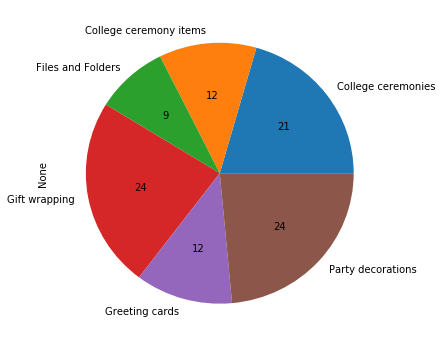

In [21]:
df_chembur['Which of these items are not available in your locality?'].str.get_dummies(sep=', ').sum().plot.pie(figsize=(6,6), autopct='%.0f')